In [228]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow_decision_forests as tfdf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [229]:
dataset = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
dataset = dataset.map(lambda x: int(x) if isinstance(x,bool) else x)

tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="Transported")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())

Use /tmp/tmppver0w4j as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.346787. Found 8693 examples.
Training model...
Model trained in 0:00:04.021207
Compiling model...
Model compiled.
Model: "random_forest_model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (13):
	Age
	Cabin
	CryoSleep
	Destination
	FoodCourt
	HomePlanet
	Name
	PassengerId
	RoomService
	ShoppingMall
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "CryoSleep"  0.237147 ################
    2.  "RoomService"  0.197283 ###########
    3.          "Spa"  0.187489 ##########
    4.       "VRDeck"  0.153583 #######
    5.    "

# Imports


In [230]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EXPLORATION


In [231]:
dataset_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


In [232]:
dataset_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [233]:
print(dataset_df.describe())
dataset_df.info()

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 co

<Axes: xlabel='Transported'>

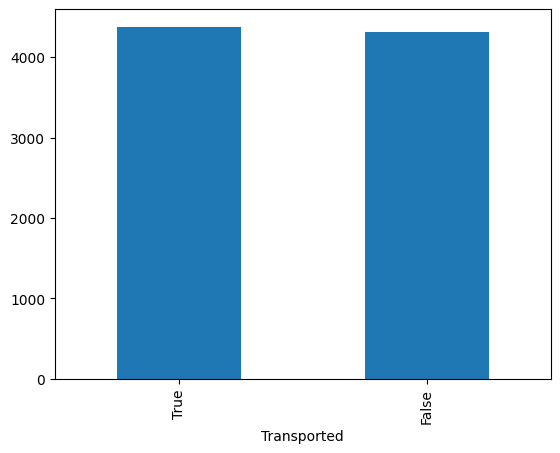

In [234]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

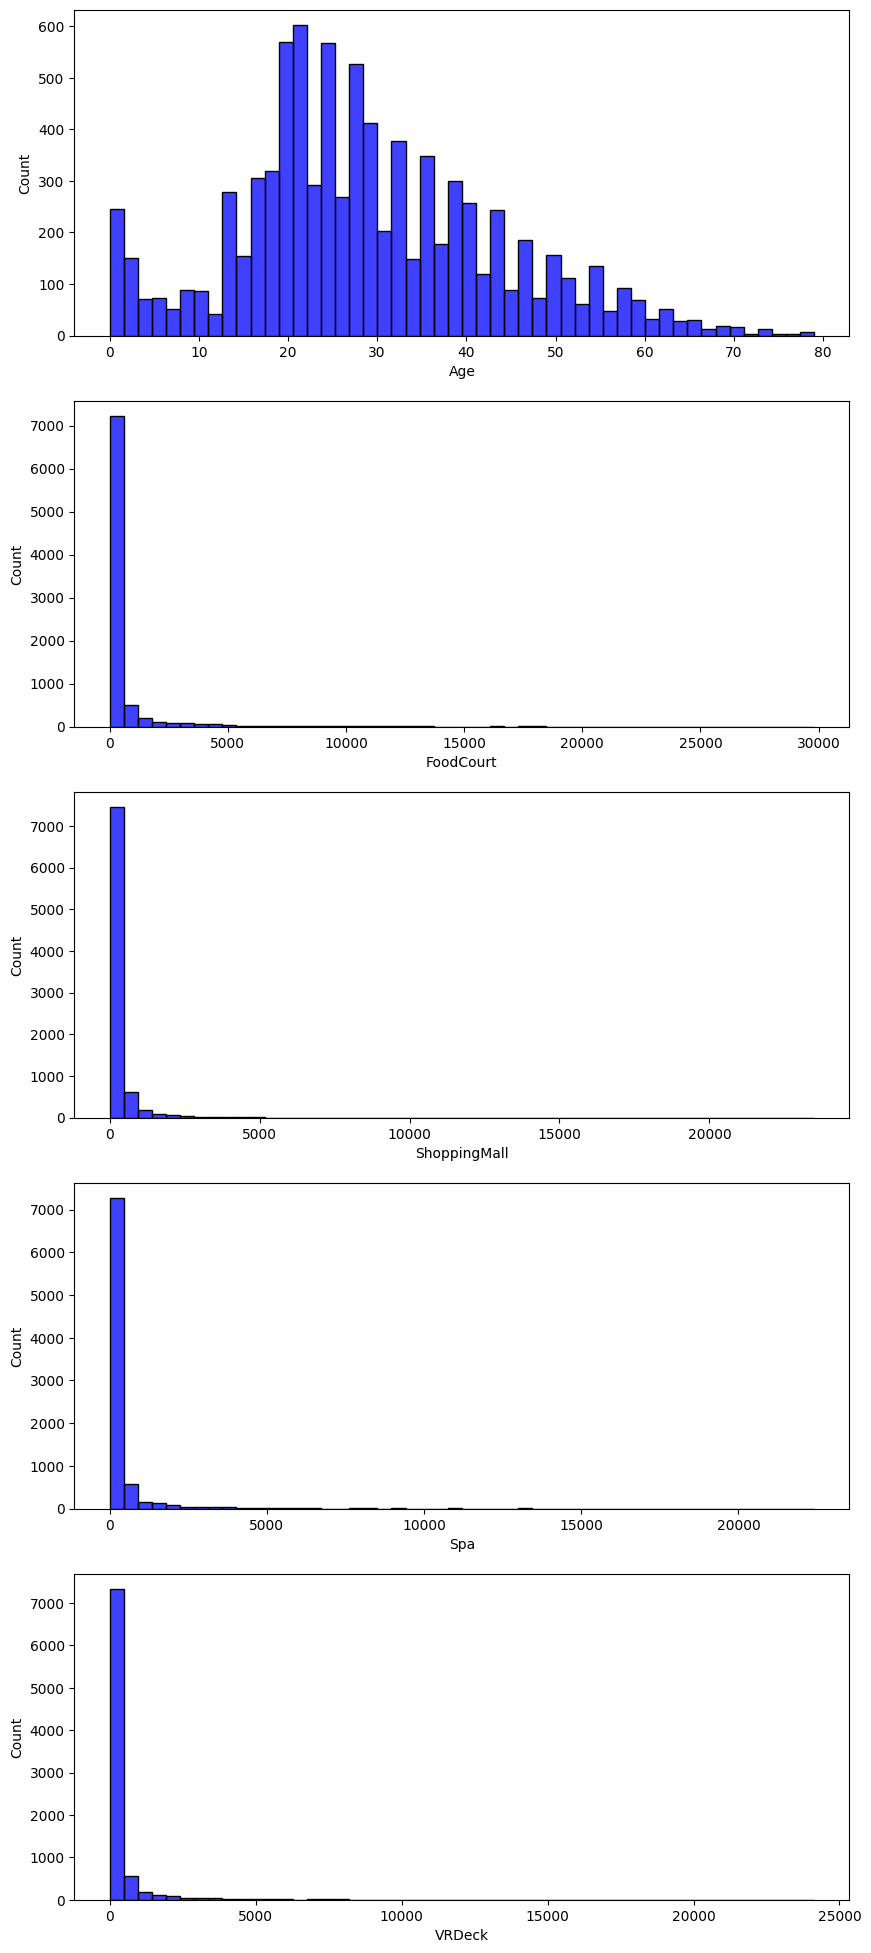

In [235]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [236]:
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)

In [237]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [238]:
#dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [239]:
dataset_df = dataset_df.map(lambda x: int(x) if isinstance(x,bool) else x)

In [240]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [241]:
dataset_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


# More visualisation

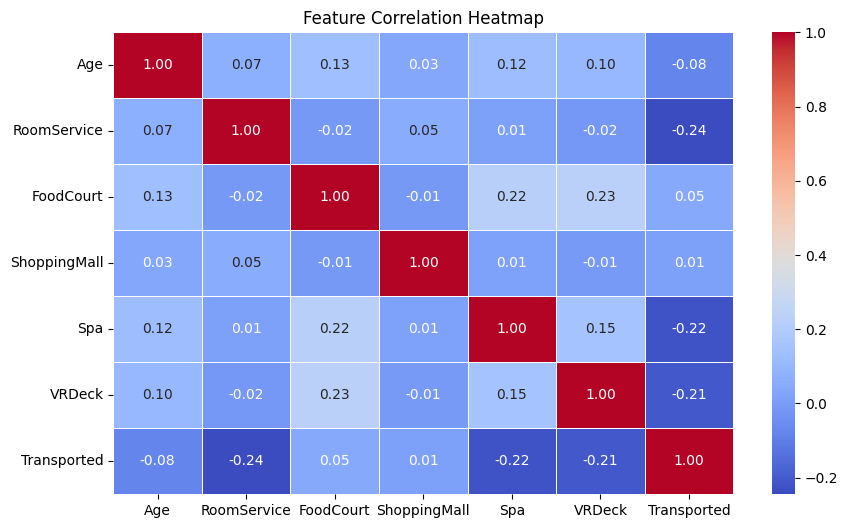

In [242]:
# 1. Correlation Heatmap for numerical features
plt.figure(figsize=(10,6))
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]
sns.heatmap(dataset_df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

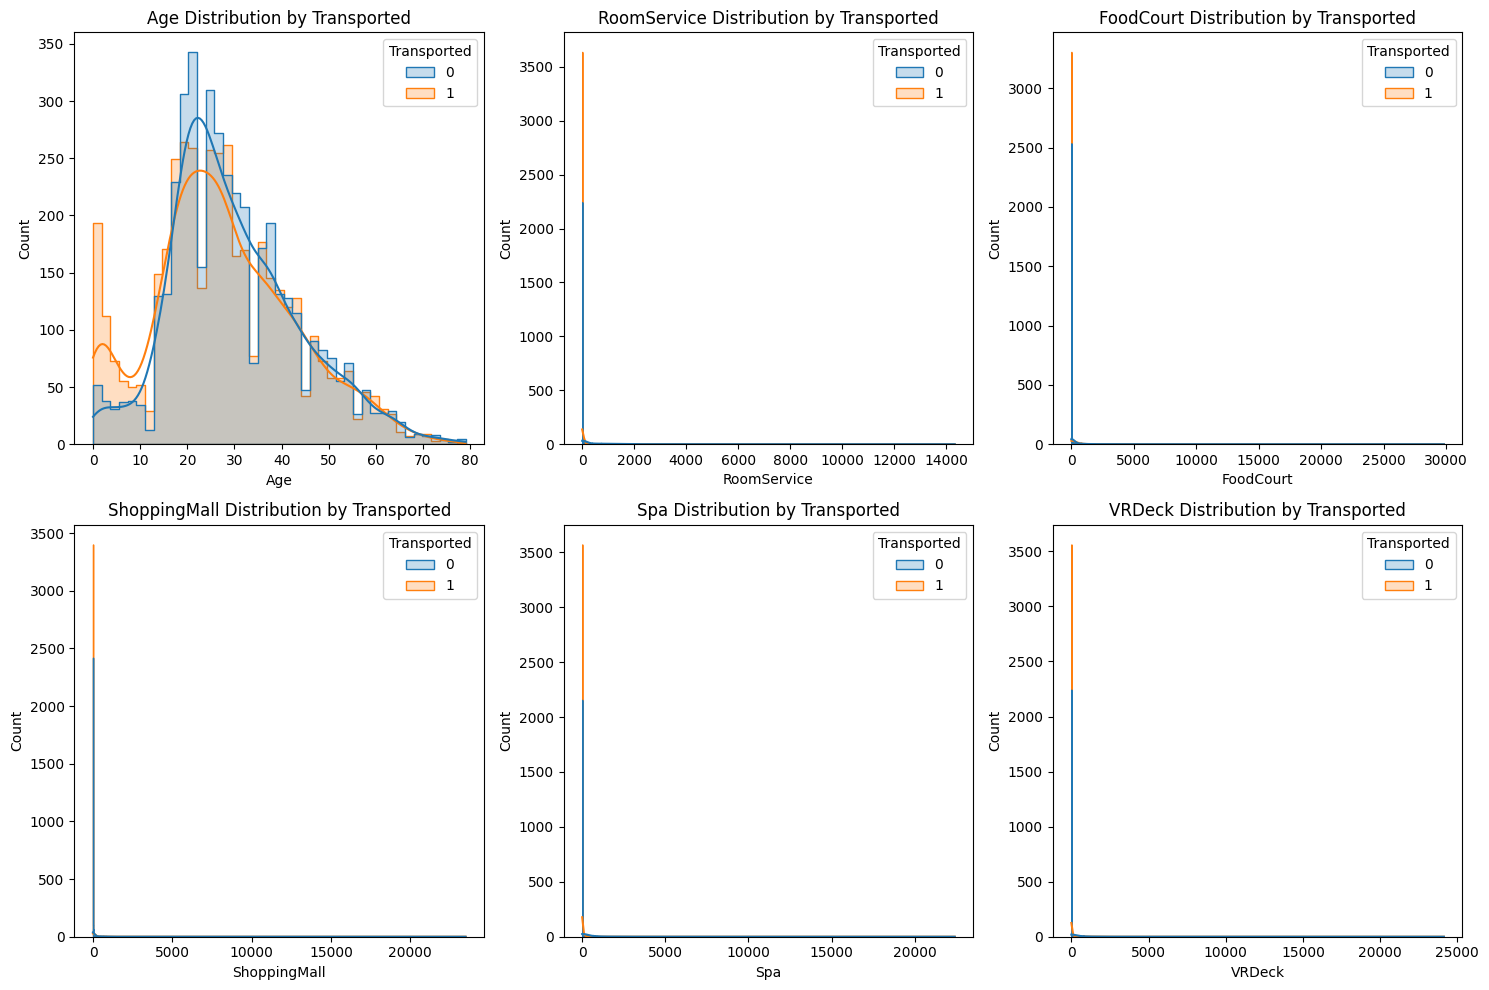

In [243]:
# 3. Feature Distributions by Target
fig, axes = plt.subplots(2, 3, figsize=(15,10))
num_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for i, feature in enumerate(num_features):
    sns.histplot(data=dataset_df, x=feature, hue="Transported", element="step", kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{feature} Distribution by Transported")
plt.tight_layout()
plt.show()

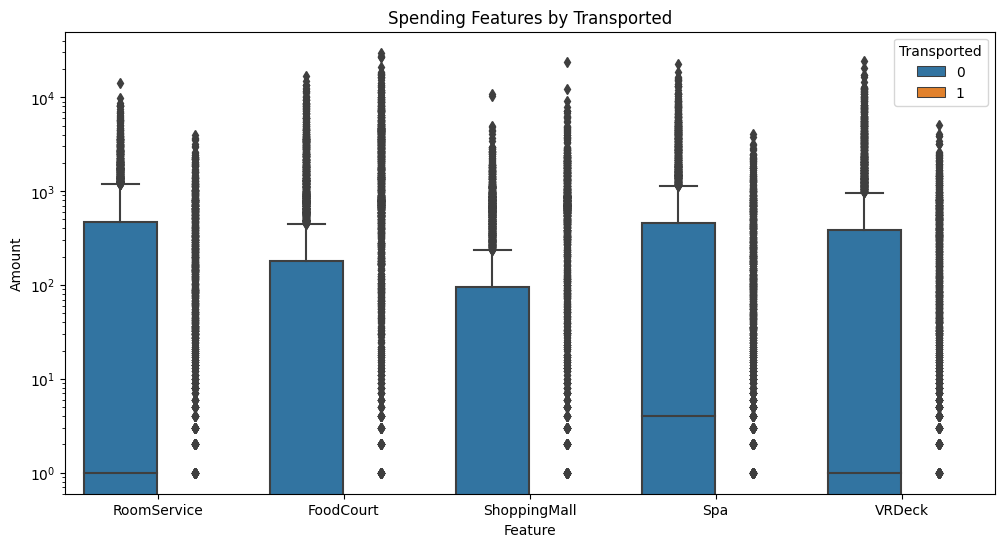

In [244]:
# 4. Boxplots for Spending Features
plt.figure(figsize=(12,6))
melted_df = dataset_df.melt(id_vars="Transported", value_vars=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], var_name="Feature", value_name="Amount")
sns.boxplot(x="Feature", y="Amount", hue="Transported", data=melted_df, palette=["#1f77b4", "#ff7f0e"])
plt.yscale("log")  # Log scale for better visibility
plt.title("Spending Features by Transported")
plt.show()

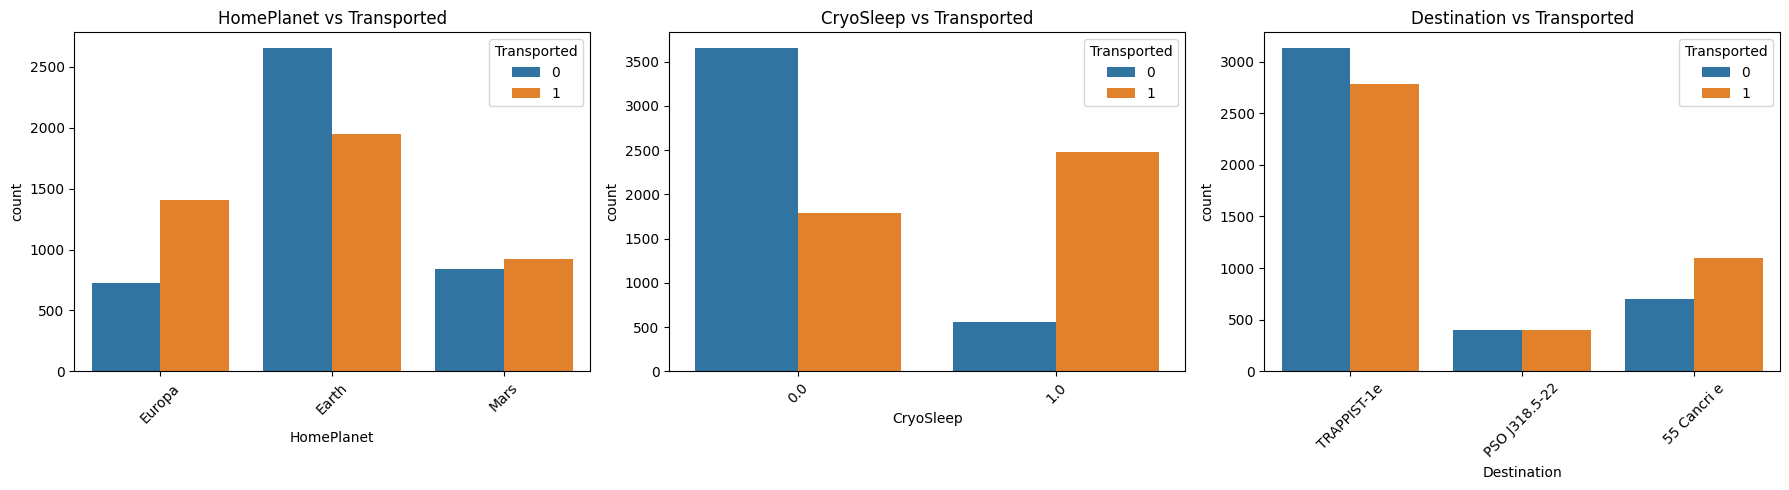

In [245]:
# 5. Categorical Feature Impact
fig, axes = plt.subplots(1, 3, figsize=(18,5))
categories = ["HomePlanet", "CryoSleep", "Destination"]
for i, cat in enumerate(categories):
    sns.countplot(data=dataset_df, x=cat, hue="Transported", ax=axes[i], palette=["#1f77b4", "#ff7f0e"])
    axes[i].set_title(f"{cat} vs Transported")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Working on features


Drop all rows with NaN

In [246]:
cleaned_df_1 = dataset_df.dropna()
dropped_rows = len(dataset_df) - len(cleaned_df_1)
print(f"Approach 1: Dropped {dropped_rows} rows due to missing values.")

Approach 1: Dropped 1929 rows due to missing values.


Fill NaN with 0


In [247]:
cleaned_df_2 = dataset_df.fillna(value=0) 
print(f"Approach 2: Replaced all NaN values with 0.")

Approach 2: Replaced all NaN values with 0.


Replace NaN with median (for numerical) and most frequent (for categorical)

In [248]:
import pandas as pd

# Copy the dataset
cleaned_df_3 = dataset_df.copy()

# List of numerical and categorical columns
numerical_columns = ['RoomService', 'Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
categorical_columns = ['HomePlanet', 'CryoSleep', 'Deck', 'Side', 'Destination', 'VIP', 'Name']

# Check if 'Name' column exists in the DataFrame, and remove it from categorical_columns if it's missing
if 'Name' not in cleaned_df_3.columns:
    categorical_columns.remove('Name')

# Handle potential non-numeric issues in 'Cabin_num' by converting it to numeric
cleaned_df_3['Cabin_num'] = pd.to_numeric(cleaned_df_3['Cabin_num'], errors='coerce')

# Fill numerical columns with median (direct assignment)
for col in numerical_columns:
    cleaned_df_3[col] = cleaned_df_3[col].fillna(cleaned_df_3[col].median())

# Fill categorical columns with the most frequent value (direct assignment)
for col in categorical_columns:
    cleaned_df_3[col] = cleaned_df_3[col].fillna(cleaned_df_3[col].mode()[0])

# Verify the changes
print(f"Approach 3: Replaced NaN with median for numerical and mode for categorical columns.")


Approach 3: Replaced NaN with median for numerical and mode for categorical columns.


In [249]:
#dataset_df["TotalSpending"] = dataset_df["VRDeck"] + dataset_df["Spa"] + dataset_df["RoomService"]
#dataset_df["SpentMoney"] = (dataset_df["TotalSpending"] > 0).astype(int)

In [250]:
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  

# Standardize the correlated features
scaler = StandardScaler()
spending_features = dataset_df[["VRDeck", "Spa", "RoomService"]].fillna(0)  # Fill NaNs if needed
spending_scaled = scaler.fit_transform(spending_features)

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 feature
dataset_df["Spending_PCA"] = pca.fit_transform(spending_scaled)

# Drop the original columns used for PCA
dataset_df.drop(columns=["VRDeck", "Spa", "RoomService"], inplace=True)

# Verify the changes
print(dataset_df.head())

  HomePlanet  CryoSleep  Destination   Age  VIP  FoodCourt  ShoppingMall  \
0     Europa        0.0  TRAPPIST-1e  39.0  0.0        0.0           0.0   
1      Earth        0.0  TRAPPIST-1e  24.0  0.0        9.0          25.0   
2     Europa        0.0  TRAPPIST-1e  58.0  1.0     3576.0           0.0   
3     Europa        0.0  TRAPPIST-1e  33.0  0.0     1283.0         371.0   
4      Earth        0.0  TRAPPIST-1e  16.0  0.0       70.0         151.0   

   Transported Deck Cabin_num Side  Spending_PCA  
0            0    B         0    P     -0.361880  
1            1    F         0    S      0.001676  
2            0    A         0    S      3.867534  
3            0    A         0    S      1.841736  
4            1    F         1    S     -0.027823  


# Training


In [251]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test by default)
train_ds_pd1, valid_ds_pd1 = train_test_split(cleaned_df_1, test_size=0.2, random_state=42)
train_ds_pd2, valid_ds_pd2 = train_test_split(cleaned_df_2, test_size=0.2, random_state=42)
train_ds_pd3, valid_ds_pd3 = train_test_split(cleaned_df_3, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"{len(train_ds_pd1)} examples in training, {len(valid_ds_pd1)} examples in testing.")

5411 examples in training, 1739 examples in testing.


In [252]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd1, label="Transported")
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd1, label="Transported")

#train_ds2 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd2, label="Transported")
#valid_ds2 = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd2, label="Transported")

train_ds3 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd3, label="Transported")
valid_ds3 = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd3, label="Transported")

In [253]:
#tfdf.keras.get_all_models()

In [268]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")
rf.compile(metrics=["accuracy"])

rf2 = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")
rf2.compile(metrics=["accuracy"])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpgyh55h3r as temporary training directory
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmps1nkpwph as temporary training directory


In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Instantiate the random forest model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")


NameError: name 'X_train' is not defined

In [269]:
rf.fit(x=train_ds)
rf2.fit(x=train_ds3)

Reading training dataset...
Training dataset read in 0:00:00.329843. Found 5411 examples.
Training model...
Model trained in 0:00:30.104278
Compiling model...
Model compiled.
Reading training dataset...
Training dataset read in 0:00:00.329166. Found 6954 examples.
Training model...
Model trained in 0:00:08.250206
Compiling model...
Model compiled.


In [256]:
#tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [270]:
inspector = rf.make_inspector()
print(inspector.evaluation())

inspector2 = rf2.make_inspector()
inspector2.evaluation()

Evaluation(num_examples=5411, accuracy=0.805581223433746, loss=0.5279514563196419, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)


Evaluation(num_examples=6954, accuracy=0.7969513948806443, loss=0.44069205335203987, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [258]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)
evaluation2 = rf2.evaluate(x=valid_ds3,return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")
for name, value in evaluation2.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 0.7982
loss: 0.0000
accuracy: 0.8049
loss: 0.0000
accuracy: 0.7982


In [259]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)
inspector.variable_importances()["NUM_AS_ROOT"]

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES
	 SUM_SCORE


[("CryoSleep" (1; #2), 99.0),
 ("RoomService" (1; #7), 85.0),
 ("Spa" (1; #10), 49.0),
 ("VRDeck" (1; #12), 35.0),
 ("ShoppingMall" (1; #8), 16.0),
 ("FoodCourt" (1; #5), 9.0),
 ("HomePlanet" (4; #6), 4.0),
 ("Deck" (4; #3), 2.0),
 ("Age" (1; #0), 1.0)]

# Submission


In [263]:
output.to_csv('/kaggle/working/submission.csv', index=False)
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [273]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow_decision_forests as tfdf

# Load the test dataset
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission_id = test_df["PassengerId"]

# Fill missing values
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Create new features from Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Convert boolean features to 0s and 1s
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# --- APPLY PCA ON TEST DATASET ---
#spending_features = ["VRDeck", "Spa", "RoomService"]

# Fill NaNs with 0 for consistency
#test_df[spending_features] = test_df[spending_features].fillna(0)

# Standardize using the same scaler as training
#scaler = StandardScaler()
#test_scaled = scaler.fit_transform(test_df[spending_features])

# Apply PCA (same model as used in training)
#pca = PCA(n_components=1)
#test_df["Spending_PCA"] = pca.fit_transform(test_scaled)

# Drop original spending features after PCA transformation
#test_df.drop(columns=spending_features, inplace=True)

# Drop any extra columns not used in training
train_features = ['RoomService', 'Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num','HomePlanet', 'CryoSleep', 'Deck', 'Side', 'Destination', 'VIP', 'Name']
test_df = test_df[train_features]
test_df['Cabin_num'] = pd.to_numeric(test_df['Cabin_num'], errors='coerce')
# Convert DataFrame to TensorFlow dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get predictions for test data
predictions = rf2.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)

# Create submission file
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


5/5 [==============================] - 1s 90ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# Extra visualisation

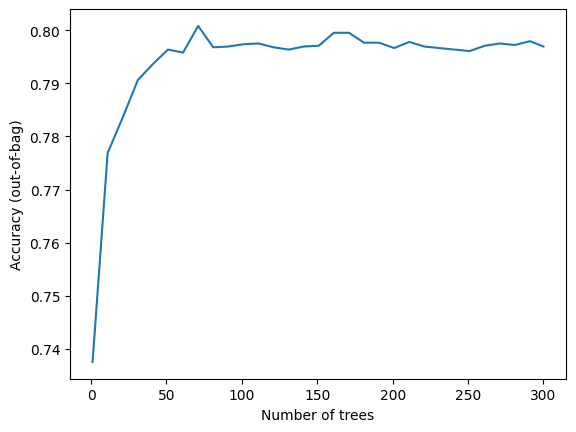

In [274]:
import matplotlib.pyplot as plt
logs = rf2.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()